The business goal of the observation is to provide the correct pricing guide for notary services.
The technical purpose is to identify variables that have a correlation with the notary's fee size.

Provided historical data was filtered by:
    - State 'AL'
    - Order status 'completed'
    - Top 10 best notaries were included in the sample.

Also, duplicates and single values, that are beyond the 95th percentile (extremely high, low, negative, and zero fees) were also dropped.

The sample included 393 orders.

Mutual Information Regression and linear regression methods were applied for each individual parameter. None of the variables showed a statistically significant constant correlation, but two were the closest: 'travel_distance' and 'product_name'. Based on them, a pricing guide was suggested:
Base rate:
**purchase** is 90 dol.
**refinance** is 95 dol.
**reverse_mortgage** is 125 dol.

And an additional fee if the travel distance is over 5 or 20 miles (+10 dol. and 20 dol. accordingly).


**(Bigly part:)
Price guidance:**

Depends on the type of signature:
Purchase fee is 90 dol.
Refinance fee is 95 dol.
Reverse mortgage fee is 125 dol.

**an additional fee will be applied if the travel distance is over 5 and 20 mi (+10 dol. and + 20 dol. accordingly).*

In [125]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

**Load the data**

In [126]:
orders = pd.read_csv('orders_(6)_(1).csv')
orders.head()

,order_id,completed_status,state,company_id,notary_id,total_notary_fee,city,appointment_date,product_name,travel_distance,docs_to_notary_sent
0,528697,completed,TN,2,32983.0,-1.0,ANTIOCH,8/19/16,refinance,8.894987,sent_by_client
1,575639,canceled,AL,1,38245.0,90.0,Montgomery,8/25/16,refinance,12.093414,sent_by_client
2,575678,completed,AL,1,64953.0,115.0,Pell City,8/25/16,refinance,19.598051,sent_by_client
3,537379,completed,TN,3,33059.0,-1.0,Johnston City,8/10/16,purchase,12.307267,sent
4,537609,completed,TN,2,32974.0,-1.0,MEMPHIS,8/3/16,refinance,5.463610,sent_by_client


In [127]:
messages = pd.read_csv('messages_(6)_(1).csv')
messages.head()

,id,order_id,notary_id,messaged_at,responded_at,response
0,419549,518331,56757,7/14/16 21:14,NaN,NaN
1,419549,518331,38401,7/14/16 21:14,NaN,NaN
2,419549,518331,43485,7/14/16 21:15,7/14/16 21:25,available
3,419549,518331,36051,7/14/16 21:15,7/14/16 21:21,not_available
4,419549,518331,65851,7/14/16 21:16,7/14/16 21:17,available


In [128]:
messages = messages.drop_duplicates(['notary_id'])

**Filter top 10 best notaties**

In [129]:
messages = messages.sort_values(['order_id', 'messaged_at']).groupby('order_id').head(10)

**Drop duplicated rows (orders dataset)**

In [130]:
orders = orders.drop_duplicates()

**Filter by state 'AL' and status 'completed'**

In [131]:
orders = orders[(orders['completed_status'] == 'completed') & (orders['state'] == 'AL')]

**Filter by top 10 notaries**

In [132]:
orders = orders[orders['notary_id'].isin(messages['notary_id'])]

**Remove outliers (extra high, low, negative and zero's notary rates)**
**by applying 3 standard deviations to the total_notary_fee field**

In [133]:
orders = orders[(np.abs(stats.zscore(orders['total_notary_fee'])) < 3)]
orders = orders.sort_values(['total_notary_fee'])

**Split out the dataset into 3 parts according to the name of 'product_name'**
**as this feature is the most correlated with the 'total_notary_fee'**

In [134]:
purchase = orders[orders['product_name'] == 'purchase']
purchase.describe()

,order_id,company_id,notary_id,total_notary_fee,travel_distance
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,567210.160000,1.080000,46847.960000,83.600000,15.100050
std,19517.823418,1.077033,16727.020906,11.503623,13.740030
min,528189.000000,0.000000,12968.000000,70.000000,0.709099
25%,553312.000000,0.000000,38668.000000,75.000000,3.455258
50%,567727.000000,1.000000,45117.000000,80.000000,11.327771
75%,582175.000000,1.000000,60124.000000,90.000000,18.297129
max,597228.000000,3.000000,71151.000000,115.000000,54.271594


In [135]:
refinance = orders[orders['product_name'] == 'refinance']
refinance.describe()

,order_id,company_id,notary_id,total_notary_fee,travel_distance
count,335.000000,335.000000,335.000000,335.000000,335.000000
mean,565009.071642,2.304478,50437.868657,94.626866,13.105551
std,16936.982010,1.045296,17977.794325,8.578339,10.434642
min,524129.000000,0.000000,1742.000000,40.000000,0.475750
25%,549818.000000,1.000000,38308.000000,95.000000,4.874319
50%,566853.000000,3.000000,53197.000000,95.000000,10.857317
75%,578351.500000,3.000000,65839.500000,95.000000,18.006090
max,599452.000000,3.000000,72190.000000,125.000000,57.544232


In [136]:
reverse_mortgage = orders[orders['product_name'] == 'reverse mortgage']
reverse_mortgage.describe()

,order_id,company_id,notary_id,total_notary_fee,travel_distance
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,571565.727273,1.818182,46341.000000,118.484848,17.479281
std,15675.501777,1.285850,16861.525928,9.311019,15.555381
min,546195.000000,0.000000,12968.000000,100.000000,1.453150
25%,558604.000000,0.000000,38245.000000,115.000000,7.796508
50%,573483.000000,2.000000,42750.000000,115.000000,13.534674
75%,587088.000000,3.000000,63528.000000,125.000000,19.591437
max,596311.000000,3.000000,71514.000000,140.000000,73.298858


**As seen from the details, 75% procentils of total_notary_fee are:**
**purchase** is 90
**refinance** is 95
**reverse_mortgage** is 125
**Which can be interpreted as a base rate fee.**

**EDA:**

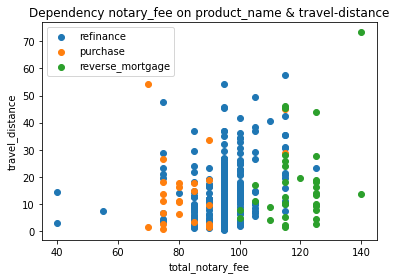

In [137]:
plt.scatter(refinance['total_notary_fee'], refinance['travel_distance'], label='refinance')
plt.scatter(purchase['total_notary_fee'], purchase['travel_distance'], label='purchase')
plt.scatter(reverse_mortgage['total_notary_fee'], reverse_mortgage['travel_distance'], label='reverse_mortgage')
plt.title('Dependency notary_fee on product_name & travel-distance')
plt.xlabel("total_notary_fee")
plt.ylabel("travel_distance")
plt.legend()
plt.show()

**As seen on the chart there total_notary_fee is also is depending on 'travel_distance'.**   
**This dependency can be interpreted as an additional cost**   
+10 dollars to the base fee if the 'travel_distance' > 5 mi and   
+20 dollars the base fee if the 'travel_distance' > 20 mi